In [279]:
import matplotlib.pyplot as plt
import numpy as np

# Question 1

> ### a) Read-in these data, and make a graph of the recorded sea-level measurements, shown as a function of time. 

In [280]:
# Read in the data
timedata,heightdata,missingdata=np.loadtxt('22.rlrdata', delimiter=';',usecols=(0,1,2),unpack=True)

timedata    = timedata.reshape((-1, 1))
start_time  = timedata[0]
heightdata  = heightdata.reshape((-1, 1))
print(timedata.shape)
print(heightdata.shape)
print(timedata[0]  ,timedata[12])  # 12 month

(1788, 1)
(1788, 1)
[1864.0416] [1865.0416]


Text(0.5, 1.0, 'Recorded sea-level measurements')

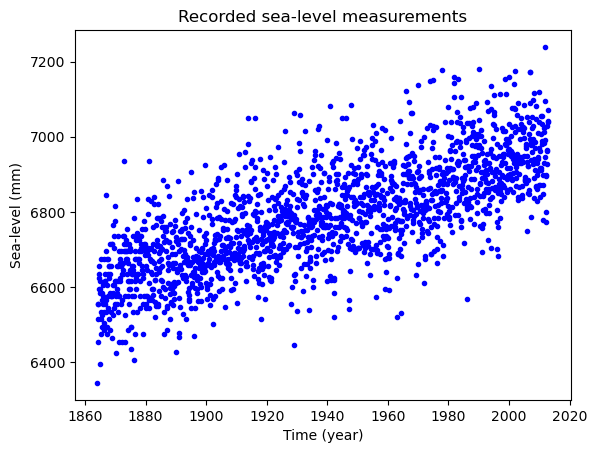

In [281]:
# Make a graph of the recorded sea-level measurements
plt.plot(timedata , heightdata, 'b.')
plt.xlabel('Time (year)')
plt.ylabel('Sea-level (mm)')
plt.title('Recorded sea-level measurements')

> ### b) Write down, symbolically, the model y=Ax  for estimating a linear trend (hence with an offset and a slope parameter) from the given sea-level measurements (in vector y ). 
> >  How many measurements, m, are there? Specify them! How many (unknown) parameters, n, does the model contain? Specify them! Specify the dimensions m x n of the A-matrix, and specify the coefficients/elements of this matrix (i.e. state how you compute them numerically). 

$$
y = Ax
$$

$$
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_m
\end{bmatrix}
= 
\begin{bmatrix}
 1 & t_0 \\
 1 & t_1 \\
\vdots & \vdots \\
 1 & t_m
\end{bmatrix}
\begin{bmatrix}
\text{offset} \\ \text{slope}
\end{bmatrix}
$$

where:

x is a vector of parameters. (offset and slope )

y is a vector of sea-level measurements.

A is a design matrix with dimensions m x n, where m is the number of measurements and n is the number of parameters.



In [282]:
# Construct the design matrix A
interc = np.ones((len(timedata),1))
A = np.hstack((interc,timedata - start_time))
print("m={:};n={:}".format(A.shape[0], A.shape[1]))

m=1788;n=2


Target : solve below linear system 
$$
y = Ax
$$?  

Given the equation:

$$
y=y_p + y_o
$$

where $y_p$ is the projection of $y$ onto the column space of $A$, and $y_o$ is the vector orthogonal to the column space of $A$.

Then, we have:

$$
Ax = y_p + y_o
$$

Since $y_o$ is orthogonal to the column space of $A$, it is also in the null space of $A^T$. Therefore, we have:

$$
A^TAx = A^Ty_p + A^Ty_o \\
A^TAx = A^Ty_p + 0
$$

Finally, we can solve for $x$ using the linear least squares estimate:

$$
x = (A^TA)^{-1}A^Ty_p
$$

This is the unweighted estimate for $x$.

In [283]:
def pseudo_inverse(A):
    # Compute the inverse of A'A
    XTX_inv = np.linalg.inv(np.matmul(A.T, A))
    # Compute the pseudo-inverse using A'A^-1A'
    matrix_pinv = np.matmul(XTX_inv, A.T)
    return matrix_pinv  

> ### c) Compute the (unweighted) least-squares solution for the unknown parameters, and report the estimated numerical values (also specify units). 


In [284]:
beta= np.matmul(pseudo_inverse(A),heightdata)
pred_linear = np.matmul (A, beta)
print("offset: {:} mm".format(beta[0].item()))
print("slope :  {:} mm/year ".format(beta[1].item()))

offset: 6609.716372172209 mm
slope :  2.396509022223944 mm/year 


> ### d) Make a graph of the recorded sea-level measurements, as a function of time, and also plot the trend (line) you just estimated. 


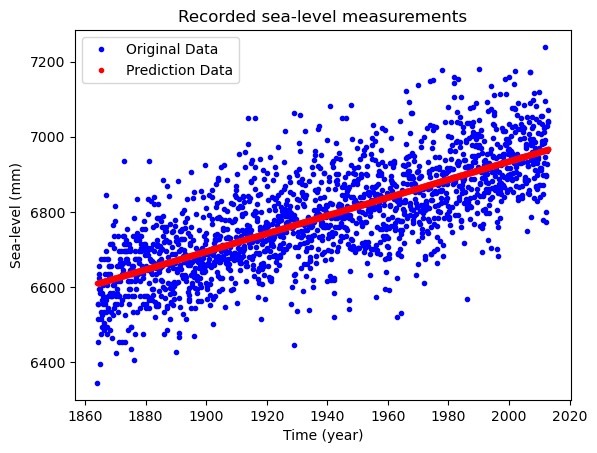

In [285]:
plt.plot(timedata , heightdata, 'b.', label='Original Data')
plt.plot(timedata , pred_linear, 'r.', label='Prediction Data')
plt.xlabel('Time (year)')
plt.ylabel('Sea-level (mm)')
plt.title('Recorded sea-level measurements')
plt.legend()

> ### e) Based on the estimates for the sea-level at time t0 and the change rate, compute the sea-level for the year 2100 (Jan 1st). By how much will the sea level rise, compared to the year 1900 (Jan mid)? 

In [286]:
sl_2100 = beta[1] * (2100.0416-start_time) + beta[0]  # predicted sea-level at Jan mid, 2100.0416
s1_t0   = beta[1] * (timedata[0]-start_time) + beta[0] 
rise = sl_2100 - s1_t0  # sea-level rise compared to t0

print("Sea-level at Jan mid, 2100: {:} mm".format(sl_2100.item()))
print("Sea-level at Jan mid, t0: {:} mm".format(s1_t0.item()))
print("Sea-level rise : {:} mm".format(rise.item()))

Sea-level at Jan mid, 2100: 7175.29250141706 mm
Sea-level at Jan mid, t0: 6609.716372172209 mm
Sea-level rise : 565.5761292448506 mm


# Question 2

$$
y(t) = x_0 + (t - t_0)x_1 + x_2 \cos(2\pi (t - t_0)) + x_3 \sin(2\pi (t - t_0))
$$

In this equation, $x_0$ is the intercept offset, $x_1$ is the slope, $x_2$ is $A\cos(\phi)$, $x_3$ is $-A\sin(\phi)$, $t$ is the time (in years), and $t_0$ is the starting time point (middle January in this case). 

In [287]:
# Construct the design matrix A
interc = np.ones((len(timedata),1))
A = np.hstack((interc , timedata - start_time , np.cos(2 * np.pi * (timedata - start_time)) , np.sin(2 * np.pi * (timedata - start_time)) ))
print(A.shape)

(1788, 4)


> ### a) Compute the least-squares solution for the four unknown parameters in the above model, and report the estimated values (also specify units). 

In [288]:
def pseudo_inverse(A):
    # Compute the inverse of A'A
    XTX_inv = np.linalg.inv(np.matmul(A.T, A))
    # Compute the pseudo-inverse using A'A^-1A'
    matrix_pinv = np.matmul(XTX_inv, A.T)
    return matrix_pinv  

beta_cos = np.matmul(pseudo_inverse(A),heightdata)
pred_cos = np.matmul (A, beta_cos)
print("parameters: offset{:} mm; slope {:} mm/year; cos solution {:}mm; sin solution {:} mm".format(beta_cos[0],beta_cos[1],beta_cos[2],beta_cos[3]))

parameters: offset[6610.13391468] mm; slope [2.39090129] mm/year; cos solution [4.28871511]mm; sin solution [-67.86780337] mm


> ### b) Parameters 𝑥3 and 𝑥4 are not directly meaningful to us. From the obtained estimates, retrieve the values for the amplitude A , and the phase $\phi$ . Report them, and specify units. 

In [289]:
def retrieve(xc,xs):
    amp = np.sqrt(xc**2 + xs**2)
    phi = np.arctan2(-xs, xc)
    return amp , phi

amp , phi = retrieve(beta_cos[2],beta_cos[3])
print("retrieve Amplitude : {:} mm".format(amp))
print("retrieve Phase shift: {:} radians or {:} months".format(phi, phi/(2*np.pi/12)))

cos_values = amp * np.cos(2 * np.pi * (timedata - start_time) + phi)

retrieve Amplitude : [68.00317501] mm
retrieve Phase shift: [1.50768805] radians or [2.87947207] months


> ### c) Can you interpret the phase shift? We estimated an annual cycle; in what period of the year is the sea-level at minimum, and when is it at maximum? 

In [290]:
# estimate extrema month in the first year 
t_min = timedata[0] + (np.pi - phi )/(2*np.pi)
t_max = timedata[0] + (2*np.pi - phi )/(2*np.pi)
print("extrema month  sea-level at minimum: {:} year sea-level at maximum {:} year".format(t_min, t_max))

extrema month  sea-level at minimum: [1864.30164399] year sea-level at maximum [1864.80164399] year


> ### e) Can you think of, and report an explanation of the behaviour observed ?

minimum sea-level month : linear: [6610.31549943] mm ;linear + cos [6542.86383663] mm
difference between linear and linear + cos at minimum sea-level month : [67.4516628] mm
Amplitude of cos fucntion : [68.00317501] mm


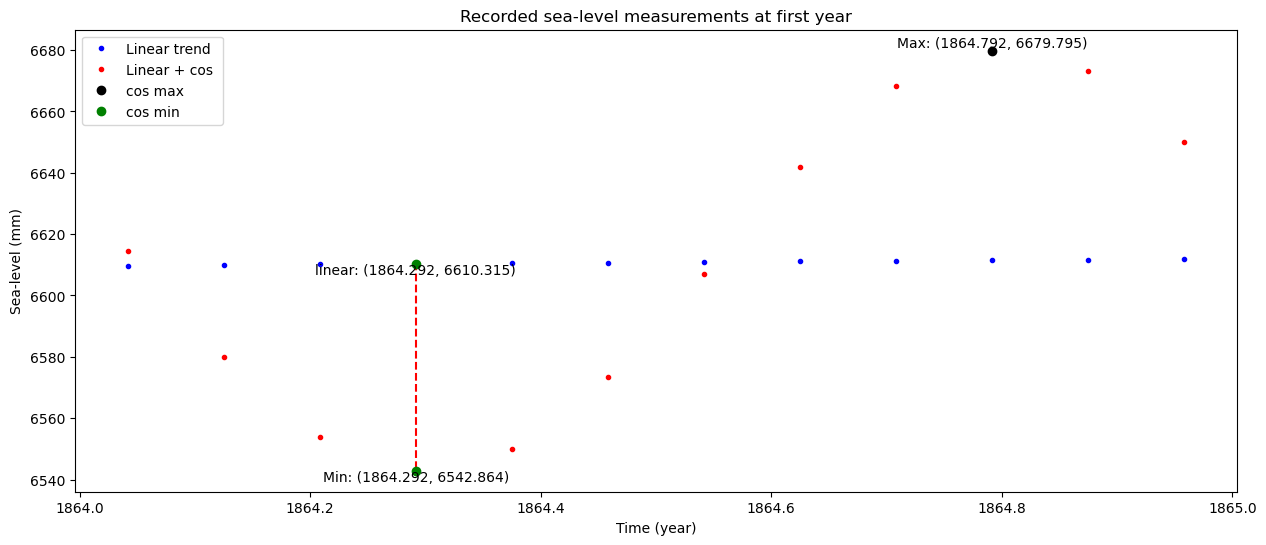

In [291]:
# only select first 12 month data 
month = 12  
# create a new figure with a larger size
fig = plt.figure(figsize=(15, 6))
plt.plot(timedata[0:month]  ,  pred_linear[0:month] , 'b.', label='Linear trend')
plt.plot(timedata[0:month]  ,  pred_cos[0:month], 'r.', label='Linear + cos ')

idx_cosmax = np.argmax(pred_cos[0:month])
idx_cosmin = np.argmin(pred_cos[0:month])

plt.axvline(x=timedata[idx_cosmin], ymin=0.05, ymax= 0.5, linestyle='--', color='red')
plt.plot(timedata[idx_cosmax], pred_cos[idx_cosmax], 'ko', label='cos max')
plt.plot(timedata[idx_cosmin], pred_cos[idx_cosmin], 'go', label='cos min')
plt.text(timedata[idx_cosmax], pred_cos[idx_cosmax], f'Max: ({timedata[idx_cosmax].item():.3f}, {pred_cos[idx_cosmax].item():.3f})', va='bottom', ha='center')
plt.text(timedata[idx_cosmin], pred_cos[idx_cosmin], f'Min: ({timedata[idx_cosmin].item():.3f}, {pred_cos[idx_cosmin].item():.3f})', va='top', ha='center')
plt.plot(timedata[idx_cosmin], pred_linear[idx_cosmin], 'go')
plt.text(timedata[idx_cosmin], pred_linear[idx_cosmin], f'linear: ({timedata[idx_cosmin].item():.3f}, {pred_linear[idx_cosmin].item():.3f})', va='top', ha='center')
plt.xlabel('Time (year)')
plt.ylabel('Sea-level (mm)')
plt.title('Recorded sea-level measurements at first year')
plt.legend()

print("minimum sea-level month : linear: {:} mm ;linear + cos {:} mm".format(pred_linear[idx_cosmin], pred_cos[idx_cosmin]))
print("difference between linear and linear + cos at minimum sea-level month : {:} mm".format(pred_linear[idx_cosmin] - pred_cos[idx_cosmin]))
print("Amplitude of cos fucntion : {:} mm".format(amp))

The phase shift in the cosine function $A\cos(2\pi(t-t_0)+\phi)$ represents the time lag between the extrema of the cosine function and a reference time, which in this case is mid-January.

The cosine function reaches its minimum value when $2\pi(t-t_0)+\phi = \pi$, and reaches its maximum value when $2\pi(t-t_0)+\phi = 2\pi$. In our case, the estimated phase shift is $\phi=1.50768805$ radians, which means that the cosine function reaches its minimum height at $t = t_0 + \frac{\pi-\phi}{2\pi}=1864.30164399$ (April of 1864) and reaches its maximum height at $t = t_0 + \frac{2\pi-\phi}{2\pi}=1864.80164399$ (October of 1864). Note that the estimated months match the results shown in the figure above.

The height difference between the linear trend and the cosine plus linear trend is $A\cos(2\pi(t-t_0)+\phi)$. As shown in the figure above, at the time $t=1864.292$ (which is the minimum height in this year), the height difference is equal to the amplitude of the cosine function, which is $A\cos(2\pi(t-t_0)+\phi)$.

# Question 3

> ### a) Using the Best Linear Unbiased (or Minimum Variance) Estimator, compute the estimates for the offset and slope parameter. 


> The monthly tide gauge sea-level observable has a standard deviation of 𝜎_yi= 60 mm, for 𝑖 = 1, … , 𝑚. The observables are uncorrelated. 

If a set of observables is known to be uncorrelated and each observable has the same variance, then the covariance matrix would be an m by m diagonal matrix with each diagonal entry equal to the variance of the observables.

This is because the covariance between any two uncorrelated observables is zero, and the covariance between an observable and itself (i.e., the diagonal entries) is just the variance of that observable. So in this case, the covariance matrix would be:
$$
Q_{yy} 
= 
\begin{bmatrix}
 var(obs_1) & 0         & \dots          & 0 \\
 0         & var(obs_2) & \dots          & 0  \\
 \vdots     & \vdots   & \vdots    & \vdots \\
 0         & 0         &  \dots         & var(obs_m)  \\
\end{bmatrix}
$$

$$
\hat{x} = (A^TQ_{yy}^{-1}A)^{-1}A^TQ_{yy}^{-1}y_p
$$

In [292]:
# Construct the design matrix A
interc = np.ones((len(timedata),1))
A = np.hstack((interc,timedata - start_time))

# BLUE estimator 
def blue_estimator(A,sigma):
    Q_yy = np.eye((A.shape[0]))*(sigma**2)  
    print("covaraince matrix of observabals: \n{:} ".format(Q_yy))
    Q_yy_inv = np.linalg.inv(Q_yy)
    XTX_inv = np.linalg.inv(np.matmul(np.matmul(A.T, Q_yy_inv), A))
    out = np.matmul(XTX_inv,np.matmul(A.T, Q_yy_inv))
    return out  

sigma = 60
beta_blue = np.matmul(blue_estimator(A,sigma),heightdata)
pred_blue = np.matmul (A, beta_blue)

print("parameters LS (Unweighted) : offset{:} mm; slope {:} mm/year".format(beta[0],beta[1]))
print("parameters BLUE            : offset{:} mm; slope {:} mm/year".format(beta_blue[0],beta_blue[1]))


covaraince matrix of observabals: 
[[3600.    0.    0. ...    0.    0.    0.]
 [   0. 3600.    0. ...    0.    0.    0.]
 [   0.    0. 3600. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 3600.    0.    0.]
 [   0.    0.    0. ...    0. 3600.    0.]
 [   0.    0.    0. ...    0.    0. 3600.]] 
parameters LS (Unweighted) : offset[6609.71637217] mm; slope [2.39650902] mm/year
parameters BLUE            : offset[6609.71637217] mm; slope [2.39650902] mm/year


> ### b) Compute the variance matrix of this estimator, and also report the standard deviation of the offset and slope estimator. 


Chapter 8.3.4 , formula 8.7
$$
Q_{\hat{x}\hat{x}} = (A^TQ_{yy}^{-1}A)^{-1}
$$

In [293]:
# Construct the design matrix A
interc = np.ones((len(timedata),1))
A = np.hstack((interc,timedata - start_time))

# variance matrix of estimator 
def var_martrix(A,sigma):
    Q_yy = np.eye((A.shape[0]))*(sigma**2)  
    Q_yy_inv = np.linalg.inv(Q_yy)    
    out = np.linalg.inv(np.matmul(np.matmul(A.T, Q_yy_inv), A))
    return out  

Q_xx = var_martrix(A,sigma)
# compute standard deviation
sd = np.sqrt(np.diag(Q_xx))
print("covaraince matrix of estimator: \n{:} ".format(Q_xx))
print("standard deviation of offset: {:} mm \nstandard deviation of slope : {:} mm/year".format(sd[0],sd[1]))

covaraince matrix of estimator: 
[[ 8.04694938e+00 -8.10321812e-02]
 [-8.10321812e-02  1.08828797e-03]] 
standard deviation of offset: 2.8367145396638405 mm 
standard deviation of slope : 0.03298920994654117 mm/year


> ### c) Compute the correlation-coefficient between the offset and slope estimator, and provide an interpretation and explanation for this result. 

Chapter 7 , page 68 ,formula 7.5
$$
\rho_{y_iy_j} = \frac{\sigma_{y_iy_j}}{\sigma_{y_i}\sigma_{y_j}}
$$

In [294]:
def corr_from_cov(cov):
    diag = np.diag(cov)
    std_dev = np.sqrt(diag)
    corr = cov / np.outer(std_dev, std_dev)
    return corr

corr_coeff= corr_from_cov(Q_xx)

print("correlation coefficient: \n{:} ".format(corr_coeff))

correlation coefficient: 
[[ 1.         -0.86590447]
 [-0.86590447  1.        ]] 


The correlation-coefficient is a measure of the linear relationship between two variables, in this case, the offset and slope estimators. The correlation-coefficient can range from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship.

In our case, the computed correlation-coefficient between the offset and slope estimators is -0.8659. This indicates a strong negative linear relationship between the two estimators. This means that when the offset estimator increases, the slope estimator decreases, and vice versa.

This result makes sense, as a larger offset would require a smaller slope to fit the data, and a smaller offset would require a larger slope to fit the data. Therefore, we would expect to see a negative correlation between these two parameters in our estimator.

> ### d) With Question 1e) we extrapolated the sea-level to the year 2100. Using error propagation (variance propagation law) compute the standard deviation of this estimator for the sea-level in 2100. 


(chapter 7 , page 69 , formula 7.9)

We consider the following linear transformation :  

$$
v = Ry + S
$$

where vector v has n elements, and consequently matrix R has n rows and m columns, and vector S is an n-­vector.

Then n×n variance matrix of v follows as : 
$$
Q_{vv} = RQ_{yy}R^{T}
$$

In [295]:
# reconstruct the design matrix A
A = np.hstack((1 , 2100.0416 - start_time ))
A    = A.reshape((1, -1))
print("design matrix A for year 2100: {:}".format(A))

def propogation_law(A,Q_xx):
    out= np.matmul(np.matmul(A, Q_xx), A.T)
    return out
Var_SL_2100 = propogation_law(A,Q_xx)

# Compute the standard deviation of the predicted sea-level in 2100
StdDev_SL_2100 = np.sqrt(Var_SL_2100)

print("Variance of the predicted sea-level in 2100: {:} mm^2".format(Var_SL_2100))
print("Standard deviation of the predicted sea-level in 2100: {:} mm".format(StdDev_SL_2100))

design matrix A for year 2100: [[  1. 236.]]
Variance of the predicted sea-level in 2100: [[30.41304679]] mm^2
Standard deviation of the predicted sea-level in 2100: [[5.51480252]] mm


# Question 4

> ### With the assumption of the functional model $E(y)=Ax $, the variance matrix $D(y)=Q_{yy} $, and that the observables are normally distributed, we can perform statistical hypothesis testing for the purpose of model validation (detection).

>> ### Can you briefly describe how you would perform a goodness-of-fit test of the assumed model? 


The main idea behind a goodness-of-fit test is to determine how well the assumed model fits the observed data.There are different methods for performing this test, but a common approach is to use the chi-square statistic.

The chi-square statistic measures the difference between the observed data and the expected values under the assumed model. It is calculated as the sum of the squared differences between the observed data and the predicted values, divided by the variance-covariance matrix of the observed data. By using the inverse of the variance-covariance matrix,$Q_{yy}^{-1}$, we effectively weight the differences between the observed data and the expected values by the inverse of their variance, such that variables with higher variability have a smaller impact on the chi-square statistic than variables with lower variability.   Mathmatical formula : 

$$\chi^2 = (y - Ax)^T Q_{yy}^{-1} (y - Ax)$$


To perform the goodness-of-fit test, we first calculate the chi-square statistic using the above formula. We then compare this value to the critical value from the chi-square distribution with n-p degrees of freedom at a chosen significance level (e.g., 0.05 or 0.01). If the chi-square value is smaller than the critical value, we accept the null hypothesis that the assumed model fits the observed data well. If the chi-square value is larger than the critical value, we reject the null hypothesis and conclude that the assumed model does not fit the observed data well.

# Question 5

$$
Q_{\hat{x}\hat{x}} = (A^TQ_{yy}^{-1}A)^{-1} 
$$
let m =2N
$$
H
=
\begin{bmatrix}
 1          & \dots    & 1   \\
 t_1        & \dots    & t_m \\
\end{bmatrix} 
\begin{bmatrix}
 \frac{1}{\sigma^2} & 0         & \dots          & 0 \\
 0         & \frac{1}{\sigma^2} & \dots          & 0  \\
 \vdots     & \vdots   & \vdots    & \vdots \\
 0         & 0         &  \dots         & \frac{1}{\sigma^2}  \\
\end{bmatrix}
\begin{bmatrix}
 1 & t_1 \\
\vdots & \vdots \\
 1 & t_m
\end{bmatrix}

=
\begin{bmatrix}
 \frac{m}{\sigma^2}                          & \frac{\sum_{i=1}^{m}t_i}{\sigma^2}   \\
 \frac{\sum_{i=1}^{m}t_i}{\sigma^2}          &  \frac{\sum_{i=1}^{m}t_i^2}{\sigma^2}  
\end{bmatrix} 
$$

$$
Q_{xx}
=
H^{-1}
=
\frac{
\begin{bmatrix}
\frac{\sum_{i=1}^{m}t_i^2}{\sigma^2}            & - \frac{\sum_{i=1}^{m}t_i}{\sigma^2}   \\
 - \frac{\sum_{i=1}^{m}t_i}{\sigma^2}          &    \frac{m}{\sigma^2}   
\end{bmatrix} 
}{
    det(H)
}
$$

$$
var(offset) =Q_{xx}[0,0] = \frac{\sigma^2}{m-1}
$$
$$
var(slope) =Q_{xx}[1,1] =  \frac{\sigma^2m}{(m-1)\sum_{i=1}^{m}t_i^2} 
$$
Assume ti = 0,1...m 
$$
\sum_{i=1}^{m}t_i^2 = \frac{m(m+1)(2m+1)}{6}
$$
$$
var(slope) =  \frac{6m\sigma^2}{m(m-1)(m+1)(2m+1)} 
$$



In the case of the offset estimator, the standard deviation decreases linearly with the number of data points because as we collect more data, we have a better estimate of the true mean of the data, which reduces the uncertainty in the offset estimation. This is because the mean of a sample is an unbiased estimator of the true population mean, and the variance of the mean decreases as the sample size increases. Therefore, the standard deviation of the offset estimator decreases at a rate proportional to $\frac{1}{\sqrt{m}}$.

In the case of the slope estimator, the standard deviation also decreases as the number of data points increases, but the rate of decrease is nonlinear. the standard deviation of the slope estimator is given by $\sqrt{\frac{6m\sigma^2}{m(m-1)(m+1)(2m+1)}}$.  As $m$ increases, the denominator of this expression grows much faster than the numerator, causing $var(slope)$ to decrease. 

In [296]:
def extract_yearly_data(data):
    yearly_data = []
    for i in range(0, np.int0((len(data)/12))-1):
        year_data = data[i*12]
        yearly_data.append(year_data)
    return yearly_data

time_yearly  = extract_yearly_data(timedata)
hight_yearly = extract_yearly_data(heightdata)

# Question 6

> ### a) In Question 3 you were instructed to use a standard deviation of  $\sigma_{y_i}$= 60 mm, for 𝑖 = 1, … , 𝑚 for your measurements. Would your parameter estimates of the offset and slope change if the standard deviation instead would be given as $\sigma{y_i}$= 80 mm, for 𝑖 = 1, … , 𝑚, and if so, by how much? What would such a change do to the precision of the estimated offset and slope? 


> ### b) Now assume that the standard deviation of the measurements is unknown, but still the same for all measurements. Can you describe a method of using your data to determine an estimate of the unknown standard deviation, as well as what then the quality of such estimate is? 

One approach to estimate the unknown standard deviation of the measurements is to use the residual sum of squares (RSS), which is defined as the sum of the squares of the differences between the observed values and the predicted values from the regression model. The RSS can be expressed as:

$$
RSS = (y - Xb)^T(y - Xb)
$$

where $y$ is the vector of observed values, $X$ is the matrix of independent variables, $b$ is the vector of regression coefficients, and $T$ denotes the transpose operation.

Assuming that the residuals $(y - Xb)$ are normally distributed with mean zero and unknown variance $\sigma^2$, the maximum likelihood estimator of $\sigma^2$ is given by:

$$
\sigma^2 = \frac{RSS}{n }
$$

where $n$ is the sample size (i.e., the number of observations).

Once an estimate of $\sigma^2$ is obtained, the standard deviation of the measurements can be estimated as the square root of $\sigma^2$.

However, the quality of such estimate depends on the assumptions of the regression model, particularly the assumption of normality and constant variance of the residuals. If these assumptions are violated, then the estimate of $\sigma^2$ may be biased or inefficient, and other methods may be more appropriate. Additionally, the sample size can also affect the precision and accuracy of the estimate (same reason answered in question 5)

In [298]:
# Construct the design matrix A
interc = np.ones((len(timedata),1))
A = np.hstack((interc,timedata - start_time))

def pseudo_inverse(A):
    # Compute the inverse of A'A
    XTX_inv = np.linalg.inv(np.matmul(A.T, A))
    # Compute the pseudo-inverse using A'A^-1A'
    matrix_pinv = np.matmul(XTX_inv, A.T)
    return matrix_pinv  

def var_estimate(y,A):
    beta = np.matmul(pseudo_inverse(A),y)
    pred = np.matmul (A, beta) 
    var  = np.matmul((y-pred).T,(y-pred))
    var  = var /(A.shape[0]-A.shape[1])
    return var

var_std = np.sqrt(var_estimate(heightdata,A))
print(var_std)


[[96.119926]]


> ### c) In Question 4 the data were assumed to be normally distributed. Now assume that the distribution is unknown. Can you describe a method of using your data to determine or verify its probability distribution? 


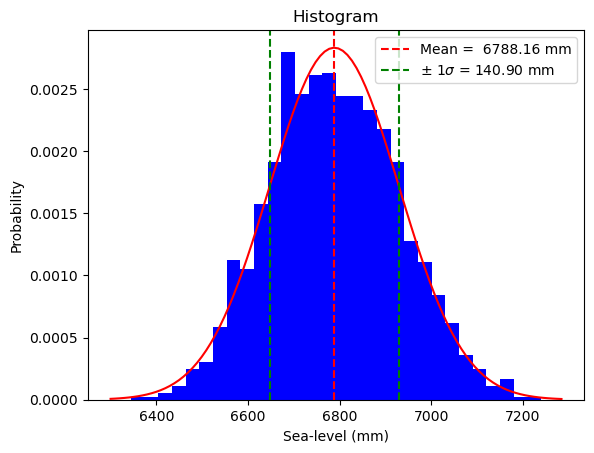

In [299]:

mean = np.mean(heightdata)
sigma = np.std(heightdata)

# Create histogram
plt.hist(heightdata, bins=30, density=True, color='blue')


# plot standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma) ** 2)
plt.plot(x, y, color='r')

# Plot line for mean
plt.axvline(x=mean, color='red', linestyle='--', label='Mean = {: .2f} mm'.format(mean))

# Plot lines for +/- sigma
plt.axvline(x=mean-sigma, color='green', linestyle='--', label='$\pm$ 1$\sigma$ = {:.2f} mm'.format(sigma))
plt.axvline(x=mean+sigma, color='green', linestyle='--')

# Set plot title and axis labels
plt.title('Histogram')
plt.xlabel('Sea-level (mm)')
plt.ylabel('Probability')

# Add legend
plt.legend()


Histogram is a graphical representation of the probability distribution of a set of data. By creating a histogram of the data, we can get an idea of the shape of the distribution. If the histogram shows a bell-shaped curve, then the data may be normally distributed. 